<a href="https://colab.research.google.com/github/MANOJKUMARKONDURU/NLP_Spam_Classifier_Project/blob/main/SpamShield_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Step 1: Import Necessary libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

#Step 2: Load the dataset

In [44]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Step 3: Data cleaning

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [46]:
df.drop(columns =['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.sample(5)

,v1,v2
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?
5387,ham,I will be gentle baby! Soon you will be taking...
4371,spam,Ur balance is now å£600. Next question: Comple...
703,ham,"Thats a bit weird, even ?- where is the do sup..."
5003,ham,There's someone here that has a year &lt;#&gt...


In [47]:
df.rename(columns={'v1': 'message_type', 'v2': 'message'}, inplace=True)
df.sample(5)

,message_type,message
5565,ham,Huh y lei...
2842,ham,"Tunji, how's the queen? how are you doing. Thi..."
5165,ham,ÌÏ still got lessons? ÌÏ in sch?
2187,ham,Oh god. I'm gonna Google nearby cliffs now.
1922,ham,I'll be in sch fr 4-6... I dun haf da book in ...


In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['message_type'] = encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

df[df['message_type'] == 1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [49]:
#Now check for the missing values
df.isnull().sum()
df.duplicated().sum()

np.int64(403)

In [50]:
#There are 403 duplicated values and we have to remove them
df = df.drop_duplicates()

#Step 4: Visuvalize the classificatioin problem

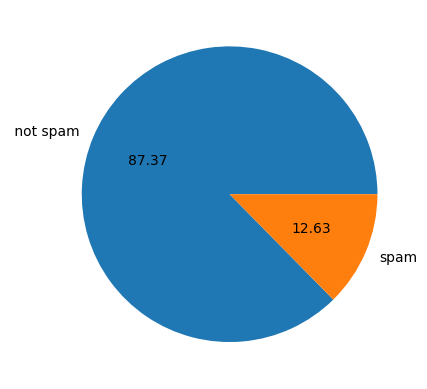

In [51]:
import matplotlib.pyplot as plt

df['message_type'].value_counts()

plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

#Step 5:

This is an imbalanced data

Now let’s find out :

* No. of characters in the data

* No. of words in the data

* No. of sentences in the data

and form 3 new columns in the data depicting the no. of character, words and sentences.



**For a number of characters**

In [52]:

#natural language too kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
df['num_characters'] = df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**for a number of words**

In [54]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:

from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))


,message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [56]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(7)

,message_type,message,num_characters,num_words
5561,0,Get me out of this dump heap. My mom decided t...,70,18
498,0,"Kate jackson rec center before 7ish, right?",43,9
5369,0,Hi mom we might be back later than &lt;#&gt;,46,15
2150,0,"The table's occupied, I'm waiting by the tree",45,11
4219,0,U free on sat rite? U wan 2 watch infernal aff...,77,20
3989,1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,137,42
1113,0,"No I'm good for the movie, is it ok if I leave...",61,18


For a number of sentences

In [57]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(7)

,message_type,message,num_characters,num_words,num_sentences
1498,0,Time n Smile r the two crucial things in our l...,154,32,2
347,0,One small prestige problem now.,31,6,1
1590,0,Somewhr someone is surely made 4 u. And God ha...,148,43,12
4455,0,If you want to mapquest it or something look u...,68,14,1
1149,0,Not a drop in the tank,22,6,1
4107,0,Pls send me your address sir.,29,7,1
2240,0,K I'll call you when I'm close,30,9,1


**For 'Ham' message**

In [58]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**For 'spam' message**

In [59]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


 We can clearly see the spam messages are quite longer than the ham messages.

<Axes: xlabel='num_characters', ylabel='Count'>

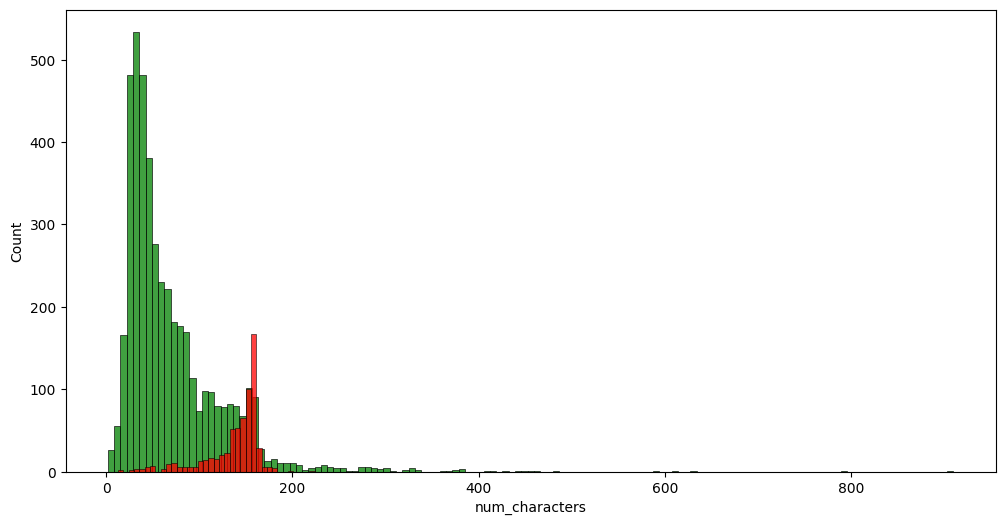

In [60]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

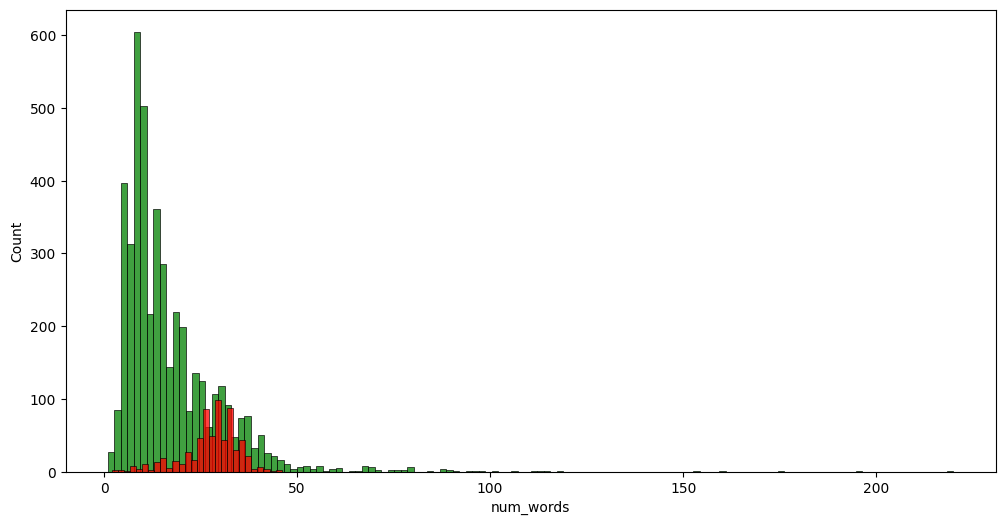

In [61]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

<Axes: >

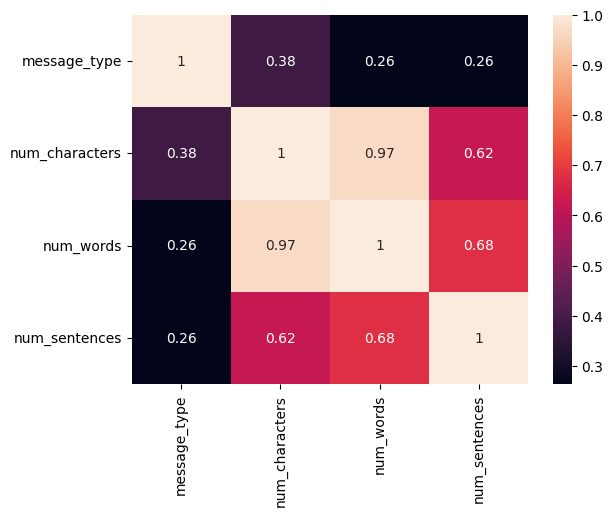

In [62]:
#plotting a heatmap for the correlation
sns.heatmap(df[['message_type','num_characters','num_words','num_sentences']].corr(),annot=True)

As we see multicollinearity here, we cannot use all three columns instead we shall use only one and that should be num_characters has it has highest correlation with message_type.

#Step 6: Data Preprocessing
1. LowerCase
2. Tokenisation
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming — lemmatisation


In [63]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    #now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)

In [64]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


198

In [65]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

Now let’s apply the text_transform function to all the messages in the dataset.

In [67]:
df['transformed_msg']=df['message'].apply(text_transform)
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


To get a clear idea about the most frequent words used we make a  word cloud.

In [68]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

**For spam**

In [69]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

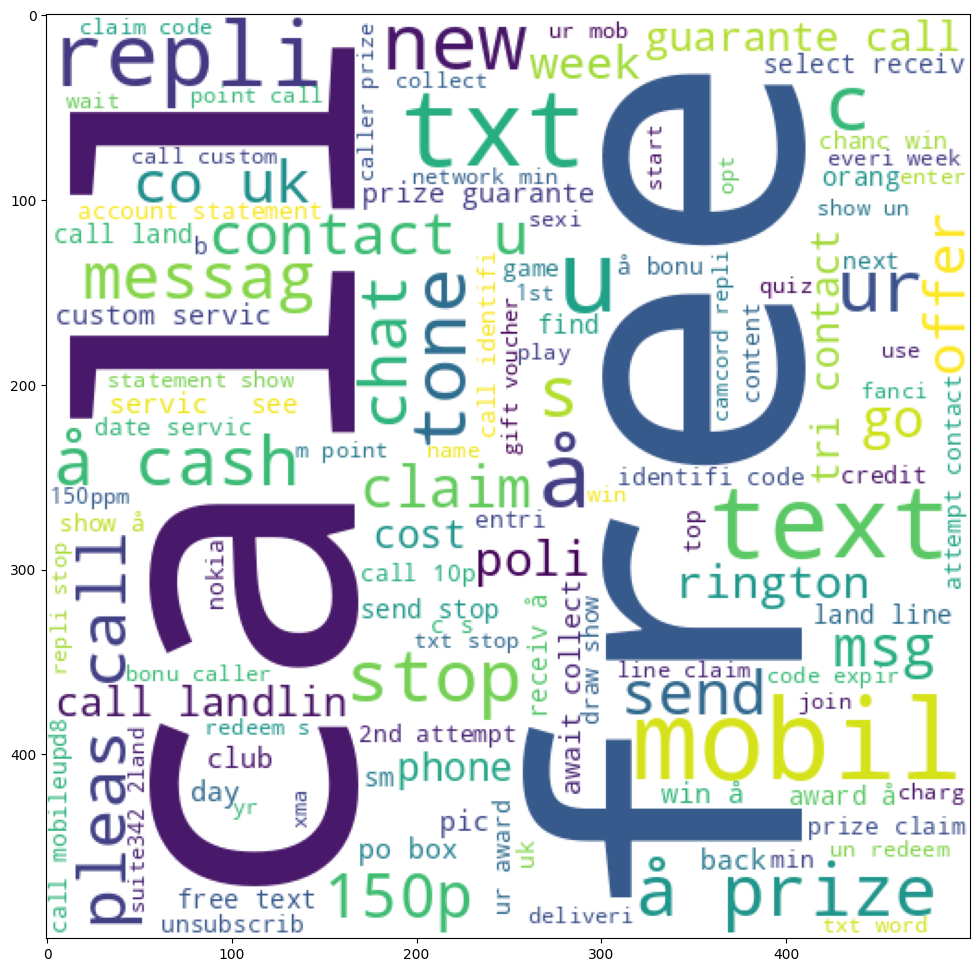

In [70]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [71]:
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

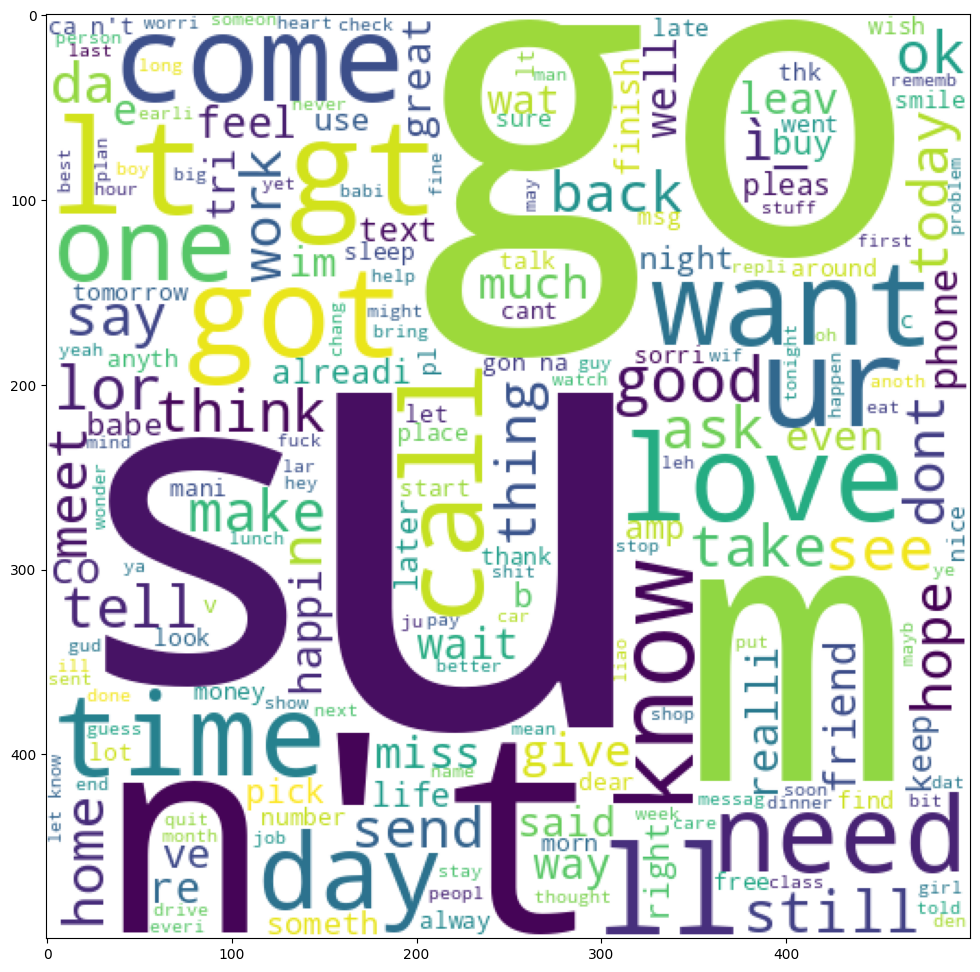

In [72]:
plt.figure(figsize=(18,12))

plt.imshow(ham_wc)

To simplify what is drawn inside the WordClouds we will find out the top 30 words used in both ham as well as spam messages.

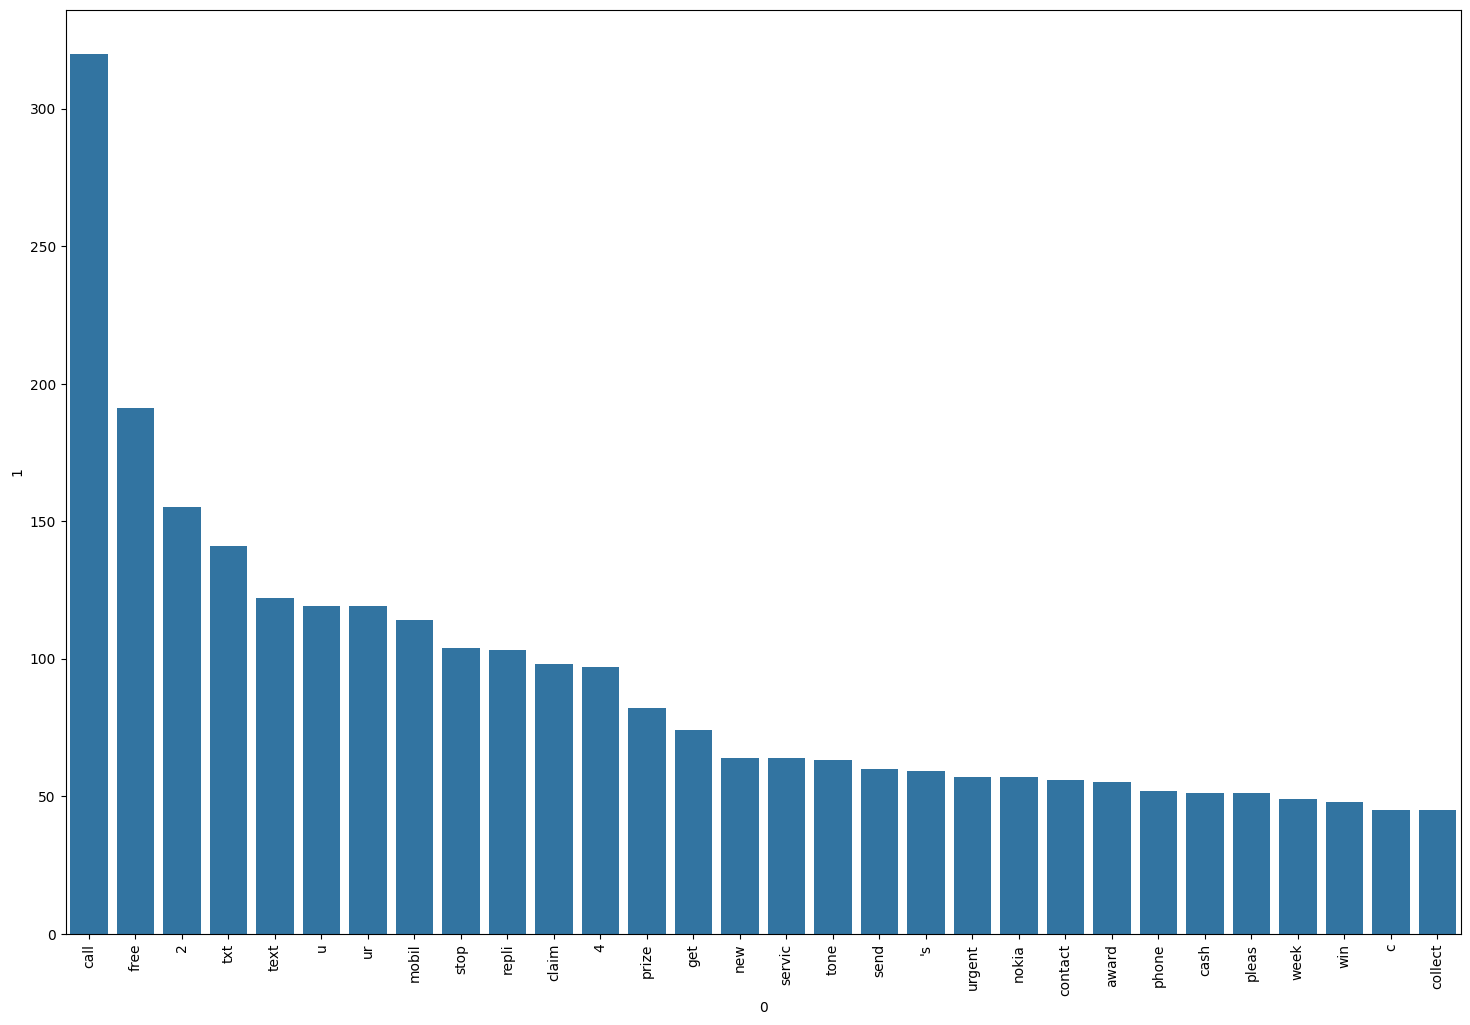

In [73]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#Step 7:Building a Model using Naive Bayes
As it is known that on Textual Data Naive Bayes Algorithm works the best hence
we will use it but along the way also compare it with different algorithms

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [76]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

Now find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes:

**With GNB**

In [77]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8820116054158608
Confusion Matrix of Guassian NB is:  [[789 107]
 [ 15 123]]
Precision score of the Gaussian NB is 0.5347826086956522


**with MNB**

In [78]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9758220502901354
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 25 113]]
Precision score of the Multinomial NB is 1.0


Here the precision comes out to be 1 which proves very good for our model as there will be no “FALSE POSITIVES”

**with BNB**

In [79]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9874274661508704
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 13 125]]
Precision score of the Bernoulli NB is 1.0


Hence we finalise the Model with MNB(Multinomial Naive Bayes) and TFIDF
Vectorization.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [81]:
clfs = {
    'SVC'      : SVC(kernel='sigmoid', gamma=1.0),
    'KN'       : KNeighborsClassifier(),
    'NB'       : MultinomialNB(),
    'DT'       : DecisionTreeClassifier(max_depth=5),
    'LR'       : LogisticRegression(solver='liblinear', penalty='l1'),
    'RF'       : RandomForestClassifier(n_estimators=50, random_state=2),
    'AdaBoost' : AdaBoostClassifier(n_estimators=50, random_state=2),
    'BgC'      : BaggingClassifier(n_estimators=50, random_state=2),
    'ETC'      : ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT'     : GradientBoostingClassifier(n_estimators=50, random_state=2),
}

accuracy_scores  = []
precision_scores = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    print(f"{name:10} → Accuracy: {accuracy_score(y_test, y_pred):.4f}  Precision: {precision_score(y_test, y_pred):.4f}")

SVC        → Accuracy: 0.9758  Precision: 0.9748
KN         → Accuracy: 0.9052  Precision: 1.0000
NB         → Accuracy: 0.9758  Precision: 1.0000
DT         → Accuracy: 0.9333  Precision: 0.8710
LR         → Accuracy: 0.9584  Precision: 0.9612
RF         → Accuracy: 0.9787  Precision: 0.9833
AdaBoost   → Accuracy: 0.9188  Precision: 0.8649
BgC        → Accuracy: 0.9574  Precision: 0.8406
ETC        → Accuracy: 0.9836  Precision: 1.0000
GBDT       → Accuracy: 0.9449  Precision: 0.9010


In [82]:
import pandas as pd

performance_df = pd.DataFrame({
    'Algorithm' : clfs.keys(),
    'Accuracy'  : accuracy_scores,
    'Precision' : precision_scores
}).sort_values('Precision', ascending=False).reset_index(drop=True)

display(performance_df)

,Algorithm,Accuracy,Precision
0,KN,0.905222,1.000000
1,NB,0.975822,1.000000
2,ETC,0.983559,1.000000
3,RF,0.978723,0.983333
4,SVC,0.975822,0.974790
5,LR,0.958414,0.961165
6,GBDT,0.944874,0.900990
7,DT,0.933269,0.870968
8,AdaBoost,0.918762,0.864865
9,BgC,0.957447,0.840580
